Building a Stock Option Valuation Model with Python
Following examples by Jacob Linger at [Medium](https://medium.com/@jacoblingerr/building-a-stock-option-valuation-model-with-python-part-i-faa7bc5be5b1#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImEyOWFiYzE5YmUyN2ZiNDE1MWFhNDMxZTk0ZmEzNjgwYWU0NThkYTUiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NzMyNzkwMjksImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjExMzUxODUwNDcxMzI3Mjc1NzUyNiIsImVtYWlsIjoiaGlnZ2luYm90aGFtLnRob21hc0BnbWFpbC5jb20iLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwiYXpwIjoiMjE2Mjk2MDM1ODM0LWsxazZxZTA2MHMydHAyYTJqYW00bGpkY21zMDBzdHRnLmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwibmFtZSI6IlRob21hcyBIaWdnaW5ib3RoYW0iLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EvQUVkRlRwN0hJdHZwcDFEbmZNdHBsWDhrN0hMSi1hMXVfUFZRWV9UV2FTbHIyQT1zOTYtYyIsImdpdmVuX25hbWUiOiJUaG9tYXMiLCJmYW1pbHlfbmFtZSI6IkhpZ2dpbmJvdGhhbSIsImlhdCI6MTY3MzI3OTMyOSwiZXhwIjoxNjczMjgyOTI5LCJqdGkiOiJmM2JiY2YwOGQxZGVjOTM3ZmNhNmFhZWM4MTU4NWM5OWRlN2YyNDQzIn0.hsf3KoeG01t8vy04s9PA7Cp7WMLv221hAC14X0K7GdqIaOy-hm2Qm0EPTtxJnNlY0tBvC73TLRYLkOm9siYOxh4X_upz_x_R8YNB95C_vCZ5RucOtYONHQKNCgtAMzTt8riEuhpcAb-YC8E3OW1ZI4iIMPi_l-YbrtG06Q56-s3usPGRvF9kzX_-6qUHjtSczOkP81m6ydDFNsJGZ_EtB14BSBRSPMPX1YnuNLJmrIyySDchSOpOQB0ZFh33-T5VT1l4vWBDhxgdpGNJN6C-k3JK2eAPCmEIK5Ju2WJueUfnrzD1U4yIsRUsIK38olCuPScBAKxxcJ-IiNHyzkUw3w)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install dfply
from dfply import *
#!pip install yfinance
import yfinance as yf
#!pip install ordered_set
from ordered_set import OrderedSet
import random
from copy import copy
#!pip install requests_html
#!pip install yahoo_fin
from yahoo_fin.stock_info import *
from yahoo_fin.options import *
import math
from datetime import date
from datetime import datetime
#%load_ext google.colab.data_table

In [4]:
#Generating S&P 500 List of Stocks

sp_list = tickers_sp500()

In [6]:
#expiration dates for the first ticker in sp_list

get_expiration_dates(sp_list[0])

['January 20, 2023',
 'February 17, 2023',
 'May 19, 2023',
 'August 18, 2023',
 'January 19, 2024',
 'January 17, 2025']

In [8]:
#Looking at the SECOND expiration date
#Creating options dataset

expiration = get_expiration_dates(sp_list[0])[1] #first ticker, second expiration date
options_df = pd.DataFrame()

for stock in sp_list:
    try:
        price = get_live_price(stock)
        option = get_calls(stock, expiration)
        option['CurrentPrice'] = price
        option['Ticker'] = stock
        option['DateExp'] = expiration
        options_df = options_df.append(option)
        print(price)
        print(stock)
    except:
        print('Option contract not available on '+ str(expiration))
        pass

C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


149.0850067138672
A


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


14.729999542236328
AAL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


154.3704071044922
AAP


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


132.9499969482422
AAPL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


163.77000427246094
ABBV


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


166.69000244140625
ABC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


113.48300170898438
ABT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


63.59000015258789
ACGL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


277.6099853515625
ACN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


348.69000244140625
ADBE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


168.5800018310547
ADI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


86.55899810791016
ADM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


242.74000549316406
ADP


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


196.0449981689453
ADSK


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


89.50499725341797
AEE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


97.7699966430664
AEP


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


27.114999771118164
AES


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


72.70999908447266
AFL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


64.5250015258789
AIG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


127.55999755859375
AIZ


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


194.15499877929688
AJG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


87.41000366210938
AKAM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


227.1199951171875
ALB


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


228.36000061035156
ALGN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


45.95000076293945
ALK


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


141.77999877929688
ALL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


113.45999908447266
ALLE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


107.77999877929688
AMAT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


12.34000015258789
AMCR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


68.44000244140625
AMD


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


146.00450134277344
AME


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


271.1700134277344
AMGN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


324.5400085449219
AMP


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


222.8800048828125
AMT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


89.19000244140625
AMZN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


116.37000274658203
ANET


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


251.58999633789062
ANSS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


311.67999267578125
AON


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


62.95000076293945
AOS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


43.834999084472656
APA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


312.7449951171875
APD


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


80.29000091552734
APH


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


99.70500183105469
APTV


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


148.3699951171875
ARE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


114.22000122070312
ATO


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


78.05480194091797
ATVI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


163.9499969482422
AVB


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


600.0150146484375
AVGO


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


190.91000366210938
AVY


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


160.8634033203125
AWK


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


151.75999450683594
AXP


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


2470.239990234375
AZO


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


210.80999755859375
BA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


34.334999084472656
BAC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


56.209999084472656
BALL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


45.560001373291016
BAX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


44.8849983215332
BBWI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


83.05500030517578
BBY


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


258.3500061035156
BDX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


28.905000686645508
BEN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


66.125
BF-B


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


276.8399963378906
BIIB


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


429.04998779296875
BIO


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


48.58000183105469
BK


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


2214.175048828125
BKNG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


30.864999771118164
BKR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


758.5449829101562
BLK


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


72.12000274658203
BMY


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


139.61720275878906
BR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


319.8399963378906
BRK-B


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


59.540000915527344
BRO


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


46.334999084472656
BSX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


43.06999969482422
BWA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


67.56739807128906
BXP


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


48.1150016784668
C


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


40.96500015258789
CAG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


78.62999725341797
CAH


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


43.939998626708984
CARR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


249.4199981689453
CAT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


227.07000732421875
CB


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


125.0
CBOE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


82.16940307617188
CBRE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


146.47320556640625
CCI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


9.538999557495117
CCL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


63.77000045776367
CDAY


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


167.39430236816406
CDNS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


186.0500030517578
CDW


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


119.0
CE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


84.97149658203125
CEG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


84.33499908447266
CF


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


41.42499923706055
CFG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


83.54000091552734
CHD


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


94.12000274658203
CHRW


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


365.32000732421875
CHTR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


301.6199951171875
CI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


109.80500030517578
CINF


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


80.25330352783203
CL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


144.60360717773438
CLX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


67.66000366210938
CMA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


37.67100143432617
CMCSA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


177.49000549316406
CME


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


1443.4949951171875
CMG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


246.92999267578125
CMI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


65.5199966430664
CMS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


78.76000213623047
CNC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


30.78499984741211
CNP


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


98.36000061035156
COF


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


346.95001220703125
COO


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


118.7699966430664
COP


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


485.6084899902344
COST


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


57.189998626708984
CPB


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


63.3849983215332
CPRT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


113.91999816894531
CPT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


227.4149932861328
CRL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


147.2938995361328
CRM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


49.10499954223633
CSCO


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


78.12999725341797
CSGP


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


32.53499984741211
CSX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


446.6675109863281
CTAS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


48.54999923706055
CTLT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


25.059999465942383
CTRA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


60.79999923706055
CTSH


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


61.875
CTVA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


92.24500274658203
CVS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


177.0
CVX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


44.09000015258789
CZR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


62.474998474121094
D


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


37.26499938964844
DAL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


73.71499633789062
DD


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


433.6451110839844
DE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


104.58999633789062
DFS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


244.6649932861328
DG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


153.7100067138672
DGX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


93.7300033569336
DHI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


256.94000244140625
DHR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


95.27999877929688
DIS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


15.75
DISH


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


101.43499755859375
DLR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


145.64999389648438
DLTR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


141.07000732421875
DOV


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


56.01499938964844
DOW


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


343.54998779296875
DPZ


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


148.38999938964844
DRI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


120.87999725341797
DTE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


106.05000305175781
DUK


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


80.16000366210938
DVA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


62.58000183105469
DVN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


28.625
DXC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


108.80999755859375
DXCM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


125.58999633789062
EA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


44.470001220703125
EBAY


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


153.07000732421875
ECL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


98.3550033569336
ED


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


208.0
EFX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


67.83000183105469
EIX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


265.260009765625
EL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


477.6199951171875
ELV


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


89.94999694824219
EMN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


99.05999755859375
EMR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


235.75999450683594
ENPH
128.13499450683594
EOG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)
C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


328.2900085449219
EPAM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


686.469970703125
EQIX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


59.43000030517578
EQR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


35.084999084472656
EQT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


86.58999633789062
ES


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


217.9600067138672
ESS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


163.63999938964844
ETN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


108.2699966430664
ETR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


123.79000091552734
ETSY


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


64.86000061035156
EVRG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


78.06999969482422
EW


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


44.150001525878906
EXC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


111.27999877929688
EXPD


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


95.22000122070312
EXPE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


147.89999389648438
EXR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


12.895000457763672
F


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


142.32000732421875
FANG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


48.83000183105469
FAST


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


44.01499938964844
FCX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


410.760009765625
FDS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


191.75
FDX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


42.47999954223633
FE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


145.9550018310547
FFIV


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


70.33499908447266
FIS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


102.15499877929688
FISV


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


34.54999923706055
FITB


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


191.75
FLT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


128.3300018310547
FMC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


29.84000015258789
FOX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


31.700000762939453
FOXA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


127.02999877929688
FRC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


104.43000030517578
FRT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


159.92999267578125
FSLR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


50.31999969482422
FTNT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


66.62999725341797
FTV


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


248.71499633789062
GD


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


73.7750015258789
GE
Option contract not available on February 17, 2023


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


21.959999084472656
GEN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


86.44999694824219
GILD


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


85.77999877929688
GIS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


123.08999633789062
GL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


35.6349983215332
GLW


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


36.80500030517578
GM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


105.83999633789062
GNRC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


90.48500061035156
GOOG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


89.73500061035156
GOOGL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


172.01510620117188
GPC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


106.62999725341797
GPN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


100.3550033569336
GRMN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


355.7749938964844
GS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


571.0599975585938
GWW


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


40.90999984741211
HAL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


64.4800033569336
HAS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


14.574999809265137
HBAN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


253.96499633789062
HCA
321.96710205078125
HD


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)
C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


146.0500030517578
HES


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


78.36000061035156
HIG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


226.77000427246094
HII


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


129.5399932861328
HLT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


80.58999633789062
HOLX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


212.76499938964844
HON


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


17.225000381469727
HPE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


29.125
HPQ


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


46.71799850463867
HRL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


81.5250015258789
HSIC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


16.290000915527344
HST


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


227.47500610351562
HSY


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


486.2300109863281
HUM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


40.775001525878906
HWM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


145.2689971923828
IBM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


106.19000244140625
ICE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


454.6600036621094
IDXX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


237.68499755859375
IEX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


112.2249984741211
IFF


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


208.9550018310547
ILMN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


80.6500015258789
INCY


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


29.7549991607666
INTC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


400.30999755859375
INTU


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


30.084999084472656
INVH


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


37.564998626708984
IP


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


35.69499969482422
IPG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


209.02000427246094
IQV


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


56.41999816894531
IR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


50.939998626708984
IRM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


271.1549987792969
ISRG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


335.510009765625
IT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


229.4340057373047
ITW


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


19.68000030517578
IVZ


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


128.86500549316406
J


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


180.22000122070312
JBHT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


67.98999786376953
JCI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


179.28750610351562
JKHY


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


178.32000732421875
JNJ


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


32.19499969482422
JNPR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


138.4875030517578
JPM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


72.37000274658203
K


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


36.470001220703125
KDP


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


18.2450008392334
KEY


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


180.38999938964844
KEYS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


42.755001068115234
KHC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


21.454999923706055
KIM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


415.80999755859375
KLAC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


138.88999938964844
KMB


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


18.709999084472656
KMI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


66.83999633789062
KMX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


63.6349983215332
KO


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


46.28499984741211
KR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


59.900001525878906
L


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


102.58000183105469
LDOS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


96.1500015258789
LEN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


245.02999877929688
LH


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


202.99000549316406
LHX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


324.25
LIN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


55.78499984741211
LKQ


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


358.17999267578125
LLY


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


464.1499938964844
LMT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


31.655000686645508
LNC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


55.369998931884766
LNT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


203.59500122070312
LOW


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


461.6199951171875
LRCX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


5.445000171661377
LUMN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


35.412498474121094
LUV


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


52.529998779296875
LVS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


99.30999755859375
LW


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


92.1500015258789
LYB


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


70.69000244140625
LYV


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


373.92999267578125
MA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


158.8800048828125
MAA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


154.69000244140625
MAR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


51.11000061035156
MAS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


268.42999267578125
MCD


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


75.29000091552734
MCHP


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


386.8599853515625
MCK


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


297.17999267578125
MCO


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


68.23500061035156
MDLZ


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


81.12000274658203
MDT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


72.66999816894531
MET


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


131.1300048828125
META


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


37.84000015258789
MGM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


114.0199966430664
MHK


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


86.1500015258789
MKC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


322.4100036621094
MKTX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


351.2200012207031
MLM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


173.90499877929688
MMC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


129.3144073486328
MMM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


102.94000244140625
MNST


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


46.540000915527344
MO


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


300.2799987792969
MOH


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


47.48500061035156
MOS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


117.01000213623047
MPC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


389.364990234375
MPWR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


113.56500244140625
MRK


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


185.86000061035156
MRNA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


27.275999069213867
MRO


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


88.86000061035156
MS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


489.1499938964844
MSCI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


230.56500244140625
MSFT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


267.8882141113281
MSI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


149.27000427246094
MTB


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


45.43000030517578
MTCH


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


1480.3349609375
MTD


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


57.28770065307617
MU


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


13.625
NCLH


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


63.189998626708984
NDAQ


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


242.9499969482422
NDSN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


84.87000274658203
NEE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


52.88999938964844
NEM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


317.393310546875
NFLX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


27.985000610351562
NI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


126.19999694824219
NKE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


500.4200134277344
NOC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


388.07501220703125
NOW


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


32.625
NRG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


256.9100036621094
NSC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


65.06999969482422
NTAP


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


95.82499694824219
NTRS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


145.51499938964844
NUE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


159.6999969482422
NVDA
Option contract not available on February 17, 2023


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


14.6850004196167
NWL
Option contract not available on February 17, 2023


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


19.290000915527344
NWSA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


163.7899932861328
NXPI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


64.72000122070312
O


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


311.0799865722656
ODFL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


29.96500015258789
OGN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


67.7959976196289
OKE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


86.29000091552734
OMC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


66.06999969482422
ON


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


87.26499938964844
ORCL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


841.02001953125
ORLY


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


82.87000274658203
OTIS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


65.13999938964844
OXY


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


19.5049991607666
PARA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


292.69500732421875
PAYC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


118.44000244140625
PAYX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


100.91000366210938
PCAR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


16.170000076293945
PCG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


26.395000457763672
PEAK


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


63.64500045776367
PEG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


182.15499877929688
PEP


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


49.560001373291016
PFE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


88.05999755859375
PFG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


154.52000427246094
PG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


135.3300018310547
PGR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


312.2650146484375
PH


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


48.95000076293945
PHM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


135.17999267578125
PKG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


135.60000610351562
PKI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


117.77999877929688
PLD


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


103.80999755859375
PM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


166.47999572753906
PNC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


47.90800094604492
PNR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


76.33000183105469
PNW


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


326.6300048828125
POOL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


130.6699981689453
PPG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


30.375
PPL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


100.1500015258789
PRU


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


284.2300109863281
PSA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


103.8949966430664
PSX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


127.6500015258789
PTC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


142.82000732421875
PWR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


231.75990295410156
PXD


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


77.99749755859375
PYPL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


118.44000244140625
QCOM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


96.94999694824219
QRVO


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


56.150001525878906
RCL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


356.4700012207031
RE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


63.41999816894531
REG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


690.2593994140625
REGN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


22.264999389648438
RF


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


76.36000061035156
RHI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


111.33499908447266
RJF


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


115.51499938964844
RL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


212.0500030517578
RMD


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


274.32000732421875
ROK


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


36.89500045776367
ROL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


448.07000732421875
ROP


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


120.83000183105469
ROST


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


129.12269592285156
RSG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


100.95149993896484
RTX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


295.6499938964844
SBAC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


118.0
SBNY


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


105.95269775390625
SBUX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


86.0199966430664
SCHW


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


296.6199951171875
SEDG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


54.040000915527344
SEE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


239.875
SHW


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


250.63499450683594
SIVB


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


162.8699951171875
SJM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


56.029998779296875
SLB


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


245.13999938964844
SNA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


331.5
SNPS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


72.13999938964844
SO


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


118.98999786376953
SPG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


354.7749938964844
SPGI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


157.55999755859375
SRE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


192.72000122070312
STE


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


103.18000030517578
STLD


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


81.8499984741211
STT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


56.349998474121094
STX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


218.02000427246094
STZ


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


83.1500015258789
SWK


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


98.38919830322266
SWKS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


32.904998779296875
SYF


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


263.5299987792969
SYK


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


79.41000366210938
SYY


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


19.198999404907227
T


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


50.90999984741211
TAP


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


657.489990234375
TDG


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


415.702392578125
TDY


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


84.08999633789062
TECH


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


123.18000030517578
TEL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


95.7300033569336
TER


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


46.189998626708984
TFC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


260.4516906738281
TFX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


159.6199951171875
TGT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


82.7300033569336
TJX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


548.4600219726562
TMO


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


149.57000732421875
TMUS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


41.630001068115234
TPR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


74.88999938964844
TRGP


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


52.845001220703125
TRMB


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


116.8499984741211
TROW


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


191.83999633789062
TRV


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


221.05999755859375
TSCO


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


121.8499984741211
TSLA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


66.68000030517578
TSN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


181.27499389648438
TT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


106.80000305175781
TTWO


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


179.7899932861328
TXN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


71.80999755859375
TXT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


325.7550048828125
TYL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


44.099998474121094
UAL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


39.08000183105469
UDR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


150.4499969482422
UHS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


488.9100036621094
ULTA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


491.9549865722656
UNH


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


215.6699981689453
UNP


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


182.58999633789062
UPS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


388.6650085449219
URI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


46.63990020751953
USB


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


221.27999877929688
V


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


29.860000610351562
VFC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


32.128700256347656
VICI


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


128.6699981689453
VLO


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


181.41000366210938
VMC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


184.55999755859375
VRSK


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


208.72000122070312
VRSN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


287.3039855957031
VRTX


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


48.06999969482422
VTR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


12.154999732971191
VTRS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


41.58000183105469
VZ


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


102.58999633789062
WAB


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


320.9800109863281
WAT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


36.70500183105469
WBA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


11.595000267028809
WBD


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


37.81999969482422
WDC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


96.33999633789062
WEC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


69.94999694824219
WELL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


43.005001068115234
WFC


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


154.77499389648438
WHR


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


160.32000732421875
WM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


32.79999923706055
WMB


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


147.41000366210938
WMT


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


74.0
WRB


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


37.470001220703125
WRK


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


240.41729736328125
WST


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


258.04998779296875
WTW


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


31.700000762939453
WY


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


94.83499908447266
WYNN


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


72.43499755859375
XEL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


109.87760162353516
XOM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


33.5099983215332
XRAY


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


113.11000061035156
XYL


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


130.31500244140625
YUM


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


126.95999908447266
ZBH


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


281.8299865722656
ZBRA


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


51.369998931884766
ZION
148.8300018310547
ZTS


C:\Users\thomas.higginbotham\AppData\Local\Temp\ipykernel_3772\199427944.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options_df = options_df.append(option)


In [9]:
#the resulting options_df dataframe:

options_df

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,CurrentPrice,Ticker,DateExp
0,A230217C00090000,2022-09-23 2:50PM EST,90.0,36.00,41.4,43.6,0.00,-,1,1,0.00%,149.085007,A,"February 17, 2023"
1,A230217C00100000,2022-08-17 1:34PM EST,100.0,46.60,32.6,33.4,0.00,-,7,3,0.00%,149.085007,A,"February 17, 2023"
2,A230217C00110000,2022-12-05 11:25AM EST,110.0,44.53,40.6,43.5,0.00,-,1,1,89.28%,149.085007,A,"February 17, 2023"
3,A230217C00120000,2022-08-09 11:23AM EST,120.0,18.80,20.4,20.8,0.00,-,1,1,0.00%,149.085007,A,"February 17, 2023"
4,A230217C00125000,2022-11-10 2:25PM EST,125.0,24.85,29.5,31.4,0.00,-,2,57,86.29%,149.085007,A,"February 17, 2023"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,ZTS230217C00180000,2022-12-21 2:35PM EST,180.0,0.44,0.05,0.8,0.04,+10.00%,2,30,40.85%,148.830002,ZTS,"February 17, 2023"
11,ZTS230217C00185000,2023-01-03 2:37PM EST,185.0,0.20,0.0,0.5,0.00,-,40,50,40.67%,148.830002,ZTS,"February 17, 2023"
12,ZTS230217C00190000,2022-12-28 12:53PM EST,190.0,0.20,0.0,0.5,0.00,-,-,20,44.48%,148.830002,ZTS,"February 17, 2023"
13,ZTS230217C00195000,2022-12-16 11:47AM EST,195.0,0.30,0.0,0.75,0.00,-,14,1,52.30%,148.830002,ZTS,"February 17, 2023"


In [10]:
#simplifying the data frame, including only required items:

options_df = options_df[['Contract Name', 'Strike','Bid', 'Ask', 'CurrentPrice', 'Volume', 'Open Interest', 'Ticker', 'DateExp']]

In [11]:
options_df

,Contract Name,Strike,Bid,Ask,CurrentPrice,Volume,Open Interest,Ticker,DateExp
0,A230217C00090000,90.0,41.4,43.6,149.085007,1,1,A,"February 17, 2023"
1,A230217C00100000,100.0,32.6,33.4,149.085007,7,3,A,"February 17, 2023"
2,A230217C00110000,110.0,40.6,43.5,149.085007,1,1,A,"February 17, 2023"
3,A230217C00120000,120.0,20.4,20.8,149.085007,1,1,A,"February 17, 2023"
4,A230217C00125000,125.0,29.5,31.4,149.085007,2,57,A,"February 17, 2023"
...,...,...,...,...,...,...,...,...,...
10,ZTS230217C00180000,180.0,0.05,0.8,148.830002,2,30,ZTS,"February 17, 2023"
11,ZTS230217C00185000,185.0,0.0,0.5,148.830002,40,50,ZTS,"February 17, 2023"
12,ZTS230217C00190000,190.0,0.0,0.5,148.830002,-,20,ZTS,"February 17, 2023"
13,ZTS230217C00195000,195.0,0.0,0.75,148.830002,14,1,ZTS,"February 17, 2023"


In [17]:
#dropping rows with '-' for either the Bid or Ask price

options_df = options_df.drop(options_df[options_df.Bid == '-'].index)
options_df = options_df.drop(options_df[options_df.Ask == '-'].index)

In [18]:
#creating an average price based on the bid and ask prices (most likely price for the option)

options_df['AvgPrice'] = (pd.to_numeric(options_df.Bid) + pd.to_numeric(options_df.Ask)) / 2

In [19]:
options_df

,Contract Name,Strike,Bid,Ask,CurrentPrice,Volume,Open Interest,Ticker,DateExp,AvgPrice
0,A230217C00090000,90.0,41.4,43.6,149.085007,1,1,A,"February 17, 2023",42.500
2,A230217C00110000,110.0,40.6,43.5,149.085007,1,1,A,"February 17, 2023",42.050
4,A230217C00125000,125.0,29.5,31.4,149.085007,2,57,A,"February 17, 2023",30.450
5,A230217C00130000,130.0,20.3,21.0,149.085007,1,40,A,"February 17, 2023",20.650
6,A230217C00135000,135.0,18.7,20.0,149.085007,1,172,A,"February 17, 2023",19.350
...,...,...,...,...,...,...,...,...,...,...
8,ZTS230217C00170000,170.0,0.55,1.15,148.830002,2,29,ZTS,"February 17, 2023",0.850
9,ZTS230217C00175000,175.0,0.2,2.85,148.830002,1,5,ZTS,"February 17, 2023",1.525
10,ZTS230217C00180000,180.0,0.05,0.8,148.830002,2,30,ZTS,"February 17, 2023",0.425
11,ZTS230217C00185000,185.0,0.0,0.5,148.830002,40,50,ZTS,"February 17, 2023",0.250


In [20]:
#Creating columns for the total option cost and breakeven percentage

options_df['OptionCost'] = options_df['AvgPrice'] * 100

options_df['BE_percent'] = ((options_df.Strike) + options_df.AvgPrice/(options_df.CurrentPrice)) - 1

In [21]:
options_df

,Contract Name,Strike,Bid,Ask,CurrentPrice,Volume,Open Interest,Ticker,DateExp,AvgPrice,OptionCost,BE_percent
0,A230217C00090000,90.0,41.4,43.6,149.085007,1,1,A,"February 17, 2023",42.500,4250.0,89.285072
2,A230217C00110000,110.0,40.6,43.5,149.085007,1,1,A,"February 17, 2023",42.050,4205.0,109.282054
4,A230217C00125000,125.0,29.5,31.4,149.085007,2,57,A,"February 17, 2023",30.450,3045.0,124.204246
5,A230217C00130000,130.0,20.3,21.0,149.085007,1,40,A,"February 17, 2023",20.650,2065.0,129.138512
6,A230217C00135000,135.0,18.7,20.0,149.085007,1,172,A,"February 17, 2023",19.350,1935.0,134.129792
...,...,...,...,...,...,...,...,...,...,...,...,...
8,ZTS230217C00170000,170.0,0.55,1.15,148.830002,2,29,ZTS,"February 17, 2023",0.850,85.0,169.005711
9,ZTS230217C00175000,175.0,0.2,2.85,148.830002,1,5,ZTS,"February 17, 2023",1.525,152.5,174.010247
10,ZTS230217C00180000,180.0,0.05,0.8,148.830002,2,30,ZTS,"February 17, 2023",0.425,42.5,179.002856
11,ZTS230217C00185000,185.0,0.0,0.5,148.830002,40,50,ZTS,"February 17, 2023",0.250,25.0,184.001680


In [22]:
# function to generate a payoff

def price_percent_payoff(x, row): #x is in decimal format
    new_price = row.CurrentPrice * (1 + x)
    if (100*new_price - 100*row.Strike - row.OptionCost) >= 0:
        payoff = 100*new_price - 100*row.Strike - row.OptionCost
    else:
            payoff = -(row.OptionCost)
    return(payoff)

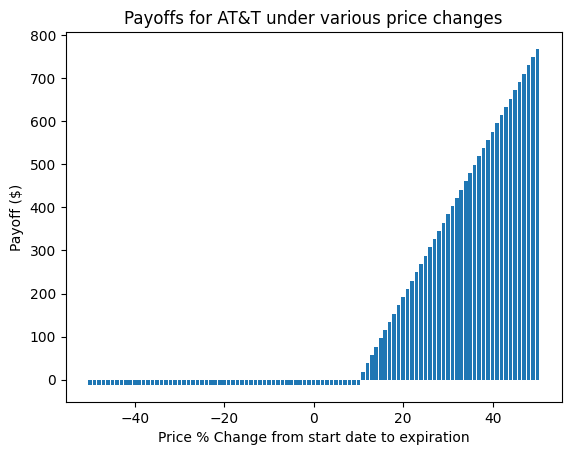

In [23]:
#Generate payoffs for an AT&T (T) option

x_axis = np.arange(-50, 51, 1)
payoffs = []
for p in range(len(x_axis)):
   percent = (p - 50)*0.01
   payoff = price_percent_payoff(
   percent,options_df[options_df.Ticker == 'T'].iloc[5])
   payoffs.append(payoff)
plt.bar(x_axis, payoffs)
plt.xlabel('Price % Change from start date to expiration')
plt.ylabel('Payoff ($)')
plt.title('Payoffs for AT&T under various price changes');
plt.savefig('T_prices.png', dpi = 800)

In [26]:
# show prices uner the breakeven percent change
# Any price under this results in a loss equal to the full price of the option contract.

options_df[options_df.Ticker == 'T'].iloc[5]['BE_percent']

20.006250325731525